In [119]:
import shapes as sh
import importlib
importlib.reload(sh)

<module 'shapes' from '/Users/maissenbenjemaa/Documents/EPFL/optimization/Project/shapes.py'>

In [115]:
from time import time
import torch
import torch.nn as nn
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression

In [123]:
curri_level_1 , curri_level_2, curri_level_3 = sh.train_data(True , False)
anti_curri_level_1 , anti_curri_level_2 , anti_curri_level_3 = sh.train_data(False , True)
rand_level =  sh.train_data(False , False)

In [141]:
test_data = sh.test_data()

## Model 1

In [41]:
# curriculum learning 

model = sh.ShapeCNN_1(num_classes=8)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

curri_losses = []
start_time = time()
for epoch in range(3):
    print(f"Epoch {epoch+1} - Easy")
    batch_losses, _ = sh.train(model, curri_level_1, criterion, optimizer)
    curri_losses.extend(batch_losses)

for epoch in range(3):
    print(f"Epoch {epoch+1} - Medium")
    batch_losses, _ = sh.train(model, curri_level_2, criterion, optimizer)
    curri_losses.extend(batch_losses)

for epoch in range(3):
    print(f"Epoch {epoch+1} - Hard")
    batch_losses, _ = sh.train(model, curri_level_3, criterion, optimizer)
    curri_losses.extend(batch_losses)

end_time = time()
acc_curri = sh.evaluate(model, test_data)
time_curri = end_time - start_time


Epoch 1 - Easy
Epoch 2 - Easy
Epoch 3 - Easy
Epoch 1 - Medium
Epoch 2 - Medium
Epoch 3 - Medium
Epoch 1 - Hard
Epoch 2 - Hard
Epoch 3 - Hard


In [42]:
# Anti_curriculum 

model = sh.ShapeCNN_1(num_classes=8)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

anti_curri_losses = []
start_time = time()
for epoch in range(3):
    print(f"Epoch {epoch+1} - Easy")
    batch_losses, _ = sh.train(model, anti_curri_level_1, criterion, optimizer)
    anti_curri_losses.extend(batch_losses)

for epoch in range(3):
    print(f"Epoch {epoch+1} - Medium")
    batch_losses, _ = sh.train(model, anti_curri_level_2, criterion, optimizer)
    anti_curri_losses.extend(batch_losses)

for epoch in range(3):
    print(f"Epoch {epoch+1} - Hard")
    batch_losses, _ = sh.train(model, anti_curri_level_3, criterion, optimizer)
    anti_curri_losses.extend(batch_losses)

end_time = time()
acc_anti_curri = sh.evaluate(model, test_data)
time_anti_curri = end_time - start_time

Epoch 1 - Easy
Epoch 2 - Easy
Epoch 3 - Easy
Epoch 1 - Medium
Epoch 2 - Medium
Epoch 3 - Medium
Epoch 1 - Hard
Epoch 2 - Hard
Epoch 3 - Hard


In [44]:
# random 
random_losses = []
model = sh.ShapeCNN_1(num_classes=8)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
start_time = time()
for epoch in range(9):  
    print(f"Epoch {epoch+1} - Shuffled")
    batch_losses, _ = sh.train(model, rand_level , criterion, optimizer)
    random_losses.extend(batch_losses)
end_time = time()
acc_random = sh.evaluate(model, test_data)
time_random = end_time - start_time

Epoch 1 - Shuffled
Epoch 2 - Shuffled
Epoch 3 - Shuffled
Epoch 4 - Shuffled
Epoch 5 - Shuffled
Epoch 6 - Shuffled
Epoch 7 - Shuffled
Epoch 8 - Shuffled
Epoch 9 - Shuffled


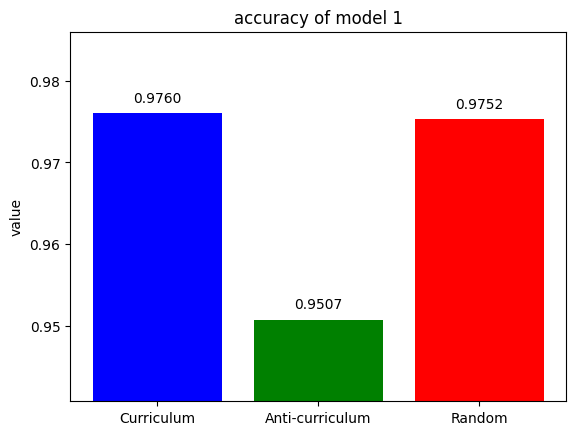

In [55]:
labels = ['Curriculum', 'Anti-curriculum', 'Random']
values = [acc_curri, acc_anti_curri, acc_random]
plt.bar(labels, values, color=['blue', 'green', 'red'])
for i, v in enumerate(values):
    plt.text(i, v + 0.001, f'{v:.4f}', ha='center', va='bottom', fontsize=10)
plt.ylim(min(values) - 0.01, max(values) + 0.01)
plt.title("accuracy of model 1")
plt.ylabel("value")
plt.show()

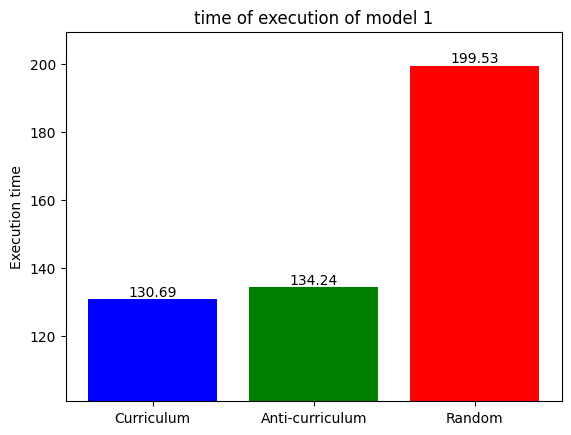

In [67]:
labels = ['Curriculum', 'Anti-curriculum', 'Random']
values = [time_curri, time_anti_curri, time_random]
plt.bar(labels, values, color=['blue', 'green', 'red'])
for i, v in enumerate(values):
    plt.text(i, v + 0.001, f'{v:.2f}', ha='center', va='bottom', fontsize=10)
plt.ylim(min(values) - 30, max(values) + 10)
plt.title("time of execution of model 1")
plt.ylabel("Execution time")
plt.show()

## Model 2

In [75]:
# curriculum learning 

model = sh.ShapeCNN_2(num_classes=8)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

curri_losses_2 = []
start_time = time()
for epoch in range(3):
    print(f"Epoch {epoch+1} - Easy")
    batch_losses, _ = sh.train(model, curri_level_1, criterion, optimizer)
    curri_losses_2.extend(batch_losses)

for epoch in range(3):
    print(f"Epoch {epoch+1} - Medium")
    batch_losses, _ = sh.train(model, curri_level_2, criterion, optimizer)
    curri_losses_2.extend(batch_losses)

for epoch in range(3):
    print(f"Epoch {epoch+1} - Hard")
    batch_losses, _ = sh.train(model, curri_level_3, criterion, optimizer)
    curri_losses_2.extend(batch_losses)

end_time = time()
acc_curri_2 = sh.evaluate(model, test_data)
time_curri_2 = end_time - start_time

Epoch 1 - Easy
Epoch 2 - Easy
Epoch 3 - Easy
Epoch 1 - Medium
Epoch 2 - Medium
Epoch 3 - Medium
Epoch 1 - Hard
Epoch 2 - Hard
Epoch 3 - Hard


In [76]:
# Anti_curriculum 

model = sh.ShapeCNN_2(num_classes=8)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

anti_curri_losses_2 = []
start_time = time()
for epoch in range(3):
    print(f"Epoch {epoch+1} - Easy")
    batch_losses, _ = sh.train(model, anti_curri_level_1, criterion, optimizer)
    anti_curri_losses_2.extend(batch_losses)

for epoch in range(3):
    print(f"Epoch {epoch+1} - Medium")
    batch_losses, _ = sh.train(model, anti_curri_level_2, criterion, optimizer)
    anti_curri_losses_2.extend(batch_losses)

for epoch in range(3):
    print(f"Epoch {epoch+1} - Hard")
    batch_losses, _ = sh.train(model, anti_curri_level_3, criterion, optimizer)
    anti_curri_losses_2.extend(batch_losses)

end_time = time()
acc_anti_curri_2 = sh.evaluate(model, test_data)
time_anti_curri_2 = end_time - start_time

Epoch 1 - Easy
Epoch 2 - Easy
Epoch 3 - Easy
Epoch 1 - Medium
Epoch 2 - Medium
Epoch 3 - Medium
Epoch 1 - Hard
Epoch 2 - Hard
Epoch 3 - Hard


In [77]:
# random 
random_losses_2 = []
model = sh.ShapeCNN_2(num_classes=8)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
start_time = time()
for epoch in range(9):  
    print(f"Epoch {epoch+1} - Shuffled")
    batch_losses, _ = sh.train(model, rand_level , criterion, optimizer)
    random_losses_2.extend(batch_losses)
end_time = time()
acc_random_2 = sh.evaluate(model, test_data)
time_random_2 = end_time - start_time

Epoch 1 - Shuffled
Epoch 2 - Shuffled
Epoch 3 - Shuffled
Epoch 4 - Shuffled
Epoch 5 - Shuffled
Epoch 6 - Shuffled
Epoch 7 - Shuffled
Epoch 8 - Shuffled
Epoch 9 - Shuffled


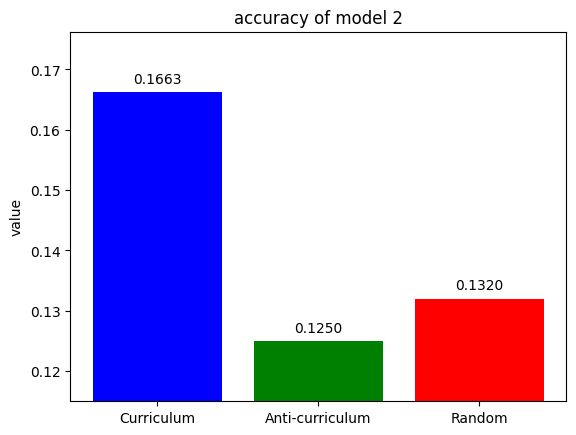

In [78]:
labels = ['Curriculum', 'Anti-curriculum', 'Random']
values = [acc_curri_2, acc_anti_curri_2, acc_random_2]
plt.bar(labels, values, color=['blue', 'green', 'red'])
for i, v in enumerate(values):
    plt.text(i, v + 0.001, f'{v:.4f}', ha='center', va='bottom', fontsize=10)
plt.ylim(min(values) - 0.01, max(values) + 0.01)
plt.title("accuracy of model 2")
plt.ylabel("value")
plt.show()

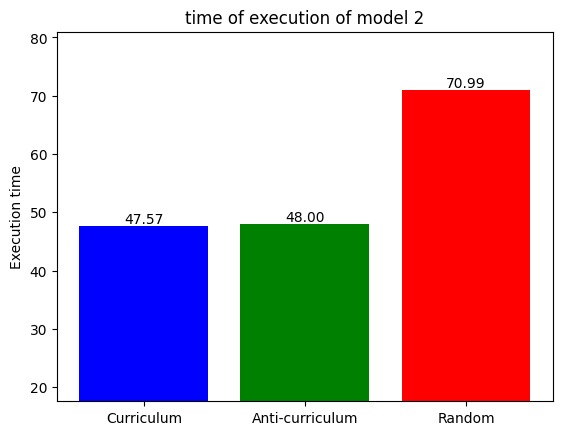

In [79]:
abels = ['Curriculum', 'Anti-curriculum', 'Random']
values = [time_curri_2, time_anti_curri_2, time_random_2]
plt.bar(labels, values, color=['blue', 'green', 'red'])
for i, v in enumerate(values):
    plt.text(i, v + 0.001, f'{v:.2f}', ha='center', va='bottom', fontsize=10)
plt.ylim(min(values) - 30, max(values) + 10)
plt.title("time of execution of model 2")
plt.ylabel("Execution time")
plt.show()

## Model 3

In [80]:
# curriculum learning 

model = sh.ShapeCNN_3(num_classes=8)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

curri_losses_3 = []
start_time = time()
for epoch in range(3):
    print(f"Epoch {epoch+1} - Easy")
    batch_losses, _ = sh.train(model, curri_level_1, criterion, optimizer)
    curri_losses_3.extend(batch_losses)

for epoch in range(3):
    print(f"Epoch {epoch+1} - Medium")
    batch_losses, _ = sh.train(model, curri_level_2, criterion, optimizer)
    curri_losses_3.extend(batch_losses)

for epoch in range(3):
    print(f"Epoch {epoch+1} - Hard")
    batch_losses, _ = sh.train(model, curri_level_3, criterion, optimizer)
    curri_losses_3.extend(batch_losses)

end_time = time()
acc_curri_3 = sh.evaluate(model, test_data)
time_curri_3 = end_time - start_time

Epoch 1 - Easy
Epoch 2 - Easy
Epoch 3 - Easy
Epoch 1 - Medium
Epoch 2 - Medium
Epoch 3 - Medium
Epoch 1 - Hard
Epoch 2 - Hard
Epoch 3 - Hard


In [82]:
# Anti_curriculum 

model = sh.ShapeCNN_3(num_classes=8)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

anti_curri_losses_3 = []
start_time = time()
for epoch in range(3):
    print(f"Epoch {epoch+1} - Easy")
    batch_losses, _ = sh.train(model, anti_curri_level_1, criterion, optimizer)
    anti_curri_losses_3.extend(batch_losses)

for epoch in range(3):
    print(f"Epoch {epoch+1} - Medium")
    batch_losses, _ = sh.train(model, anti_curri_level_2, criterion, optimizer)
    anti_curri_losses_3.extend(batch_losses)

for epoch in range(3):
    print(f"Epoch {epoch+1} - Hard")
    batch_losses, _ = sh.train(model, anti_curri_level_3, criterion, optimizer)
    anti_curri_losses_3.extend(batch_losses)

end_time = time()
acc_anti_curri_3 = sh.evaluate(model, test_data)
time_anti_curri_3 = end_time - start_time

Epoch 1 - Easy
Epoch 2 - Easy
Epoch 3 - Easy
Epoch 1 - Medium
Epoch 2 - Medium
Epoch 3 - Medium
Epoch 1 - Hard
Epoch 2 - Hard
Epoch 3 - Hard


In [83]:
# random 
random_losses_3 = []
model = sh.ShapeCNN_3(num_classes=8)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
start_time = time()
for epoch in range(9):  
    print(f"Epoch {epoch+1} - Shuffled")
    batch_losses, _ = sh.train(model, rand_level , criterion, optimizer)
    random_losses_3.extend(batch_losses)
end_time = time()
acc_random_3 = sh.evaluate(model, test_data)
time_random_3 = end_time - start_time

Epoch 1 - Shuffled
Epoch 2 - Shuffled
Epoch 3 - Shuffled
Epoch 4 - Shuffled
Epoch 5 - Shuffled
Epoch 6 - Shuffled
Epoch 7 - Shuffled
Epoch 8 - Shuffled
Epoch 9 - Shuffled


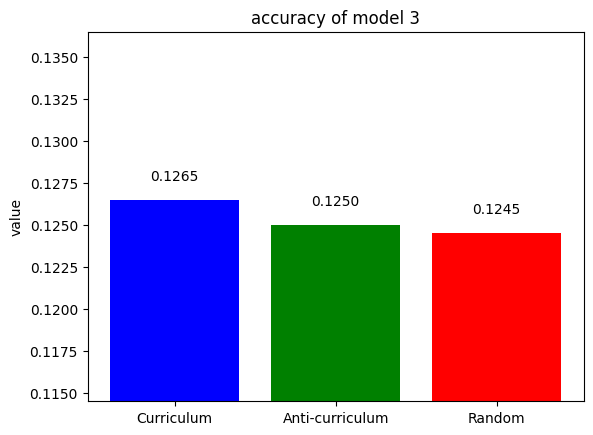

In [84]:
labels = ['Curriculum', 'Anti-curriculum', 'Random']
values = [acc_curri_3, acc_anti_curri_3, acc_random_3]
plt.bar(labels, values, color=['blue', 'green', 'red'])
for i, v in enumerate(values):
    plt.text(i, v + 0.001, f'{v:.4f}', ha='center', va='bottom', fontsize=10)
plt.ylim(min(values) - 0.01, max(values) + 0.01)
plt.title("accuracy of model 3")
plt.ylabel("value")
plt.show()

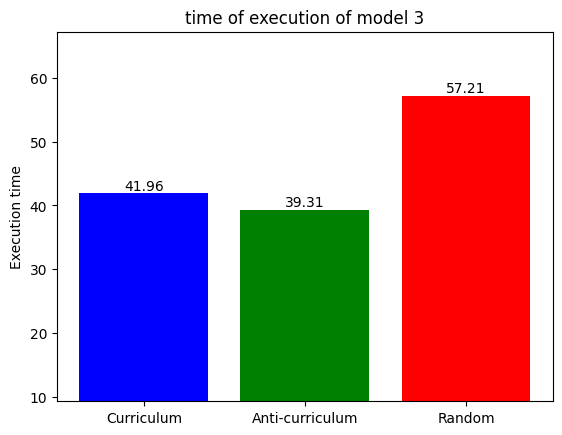

In [85]:
abels = ['Curriculum', 'Anti-curriculum', 'Random']
values = [time_curri_3, time_anti_curri_3, time_random_3]
plt.bar(labels, values, color=['blue', 'green', 'red'])
for i, v in enumerate(values):
    plt.text(i, v + 0.001, f'{v:.2f}', ha='center', va='bottom', fontsize=10)
plt.ylim(min(values) - 30, max(values) + 10)
plt.title("time of execution of model 3")
plt.ylabel("Execution time")
plt.show()

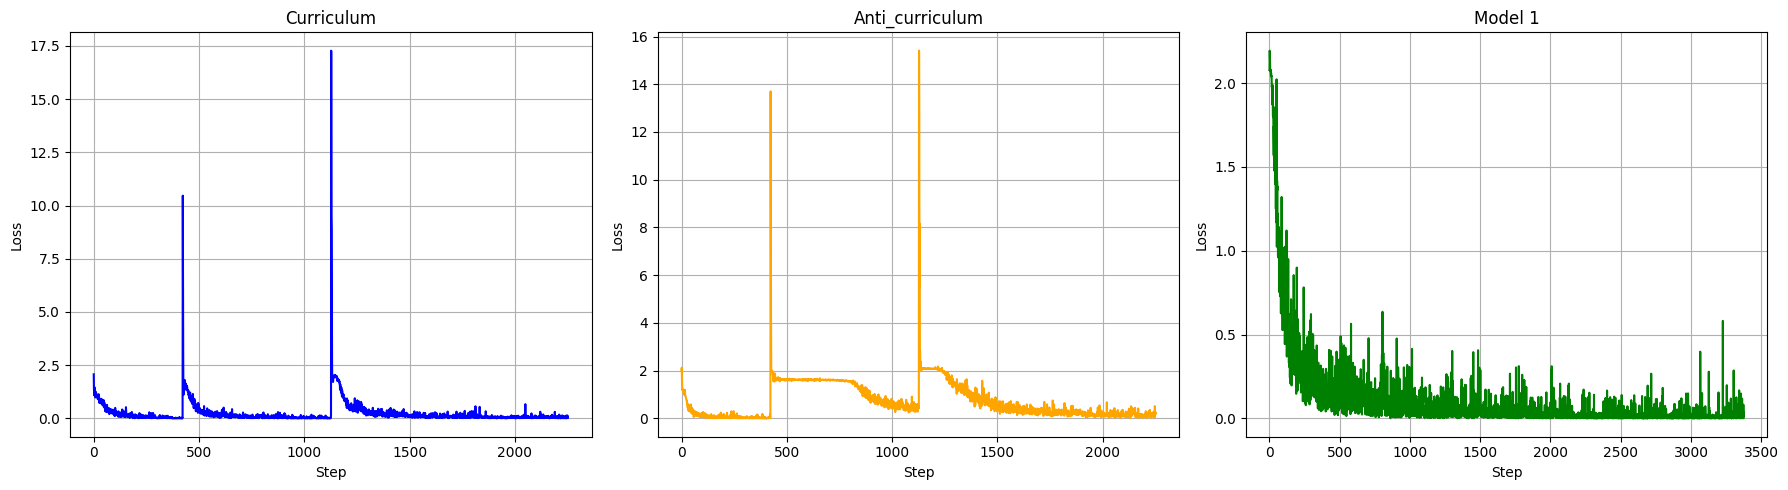

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  

# -------- Curriculum --------
axes[0].plot(curri_losses, label='Curriculum', color='blue')
axes[0].set_title('Curriculum')
axes[0].set_xlabel('Step')
axes[0].set_ylabel('Loss')
axes[0].grid(True)

# -------- Anti-curriculum --------
axes[1].plot(anti_curri_losses, label='Anti_curriculum', color='orange')
axes[1].set_title('Anti_curriculum')
axes[1].set_xlabel('Step')
axes[1].set_ylabel('Loss')
axes[1].grid(True)

# --------  Random --------
axes[2].plot(random_losses, label='Random', color='green')
axes[2].set_title('Random')
axes[2].set_xlabel('Step')
axes[2].set_ylabel('Loss')
axes[2].grid(True)

plt.tight_layout()
plt.show()

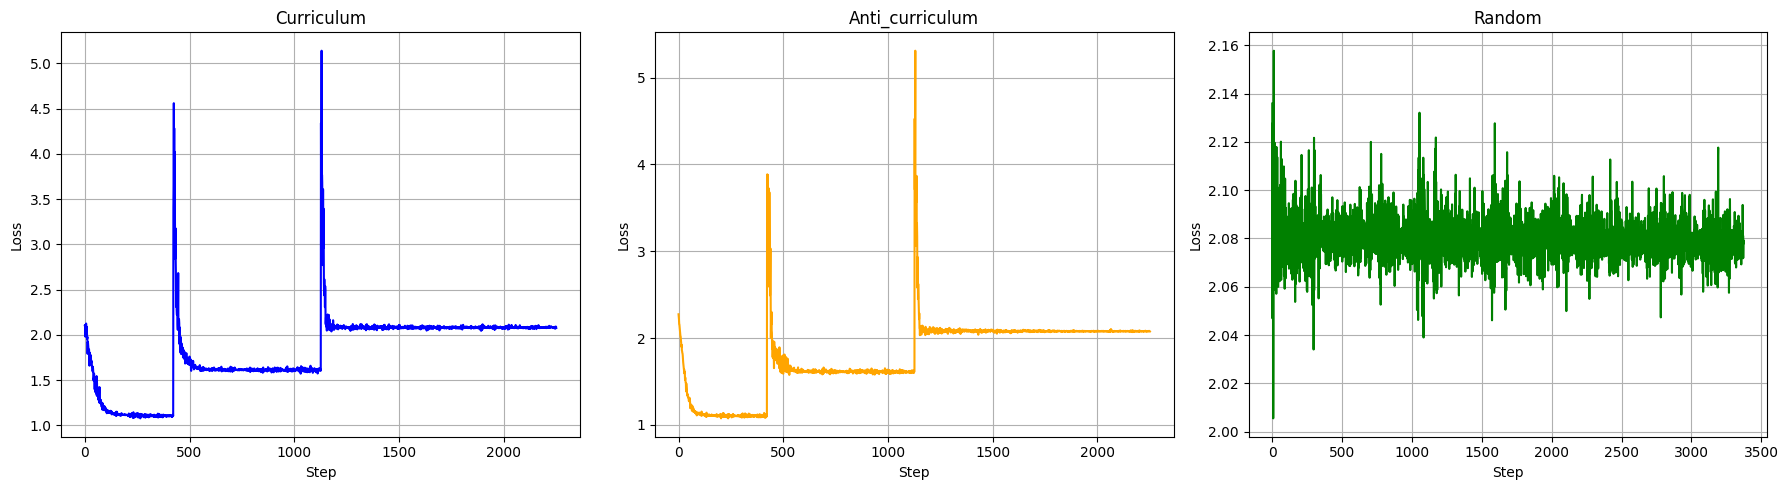

In [112]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  

# -------- Curriculum --------
axes[0].plot(curri_losses_2, label='Curriculum', color='blue')
axes[0].set_title('Curriculum')
axes[0].set_xlabel('Step')
axes[0].set_ylabel('Loss')
axes[0].grid(True)

# -------- Anti-curriculum --------
axes[1].plot(anti_curri_losses_2, label='Anti_curriculum', color='orange')
axes[1].set_title('Anti_curriculum')
axes[1].set_xlabel('Step')
axes[1].set_ylabel('Loss')
axes[1].grid(True)

# --------  Random --------
axes[2].plot(random_losses_2, label='Random', color='green')
axes[2].set_title('Random')
axes[2].set_xlabel('Step')
axes[2].set_ylabel('Loss')
axes[2].grid(True)

plt.tight_layout()
plt.show()

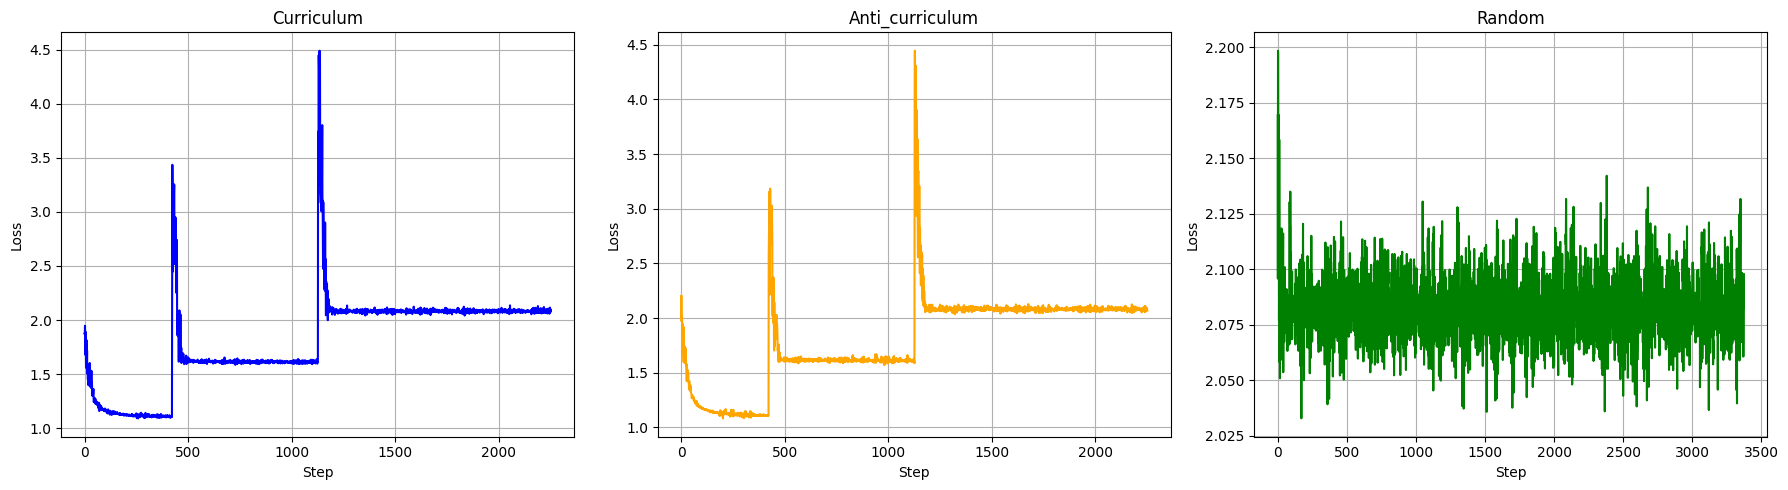

In [113]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  

# -------- Curriculum --------
axes[0].plot(curri_losses_3, label='Curriculum', color='blue')
axes[0].set_title('Curriculum')
axes[0].set_xlabel('Step')
axes[0].set_ylabel('Loss')
axes[0].grid(True)

# -------- Anti-curriculum --------
axes[1].plot(anti_curri_losses_3, label='Anti_curriculum', color='orange')
axes[1].set_title('Anti_curriculum')
axes[1].set_xlabel('Step')
axes[1].set_ylabel('Loss')
axes[1].grid(True)

# --------  Random --------
axes[2].plot(random_losses_3, label='Random', color='green')
axes[2].set_title('Random')
axes[2].set_xlabel('Step')
axes[2].set_ylabel('Loss')
axes[2].grid(True)

plt.tight_layout()
plt.show()

### Effect of the optimizer 

### Model 2 + SGD

In [161]:
# curriculum learning 

model = sh.ShapeCNN_2(num_classes=8)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

curri_losses_SGD_2 = []
start_time = time()
for epoch in range(3):
    print(f"Epoch {epoch+1} - Easy")
    batch_losses, _ = sh.train(model, curri_level_1, criterion, optimizer)
    curri_losses_SGD_2.extend(batch_losses)

for epoch in range(3):
    print(f"Epoch {epoch+1} - Medium")
    batch_losses, _ = sh.train(model, curri_level_2, criterion, optimizer)
    curri_losses_SGD_2.extend(batch_losses)

for epoch in range(3):
    print(f"Epoch {epoch+1} - Hard")
    batch_losses, _ = sh.train(model, curri_level_3, criterion, optimizer)
    curri_losses_SGD_2.extend(batch_losses)

end_time = time()
acc_curri_SGD_2 = sh.evaluate(model, test_data)
time_curri_SGD_2 = end_time - start_time

Epoch 1 - Easy
Epoch 2 - Easy
Epoch 3 - Easy
Epoch 1 - Medium
Epoch 2 - Medium
Epoch 3 - Medium
Epoch 1 - Hard
Epoch 2 - Hard
Epoch 3 - Hard


In [162]:
# Anti_curriculum 

model = sh.ShapeCNN_2(num_classes=8)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

anti_curri_losses_SGD_2 = []
start_time = time()
for epoch in range(3):
    print(f"Epoch {epoch+1} - Easy")
    batch_losses, _ = sh.train(model, anti_curri_level_1, criterion, optimizer)
    anti_curri_losses_SGD_2.extend(batch_losses)

for epoch in range(3):
    print(f"Epoch {epoch+1} - Medium")
    batch_losses, _ = sh.train(model, anti_curri_level_2, criterion, optimizer)
    anti_curri_losses_SGD_2.extend(batch_losses)

for epoch in range(3):
    print(f"Epoch {epoch+1} - Hard")
    batch_losses, _ = sh.train(model, anti_curri_level_3, criterion, optimizer)
    anti_curri_losses_SGD_2.extend(batch_losses)

end_time = time()
acc_anti_curri_SGD_2 = sh.evaluate(model, test_data)
time_anti_curri_SGD_2 = end_time - start_time

Epoch 1 - Easy
Epoch 2 - Easy
Epoch 3 - Easy
Epoch 1 - Medium
Epoch 2 - Medium
Epoch 3 - Medium
Epoch 1 - Hard
Epoch 2 - Hard
Epoch 3 - Hard


In [163]:
# random 
random_losses_SGD_2 = []
model = sh.ShapeCNN_2(num_classes=8)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)
start_time = time()
for epoch in range(9):  
    print(f"Epoch {epoch+1} - Shuffled")
    batch_losses, _ = sh.train(model, rand_level , criterion, optimizer)
    random_losses_SGD_2.extend(batch_losses)
end_time = time()
acc_random_SGD_2 = sh.evaluate(model, test_data)
time_random_SGD_2 = end_time - start_time

Epoch 1 - Shuffled
Epoch 2 - Shuffled
Epoch 3 - Shuffled
Epoch 4 - Shuffled
Epoch 5 - Shuffled
Epoch 6 - Shuffled
Epoch 7 - Shuffled
Epoch 8 - Shuffled
Epoch 9 - Shuffled


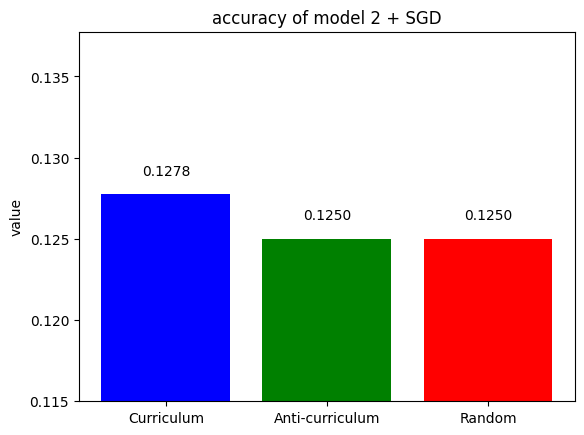

In [168]:
labels = ['Curriculum', 'Anti-curriculum', 'Random']
values = [acc_curri_SGD_2, acc_anti_curri_SGD_2, acc_random_SGD_2]
plt.bar(labels, values, color=['blue', 'green', 'red'])
for i, v in enumerate(values):
    plt.text(i, v + 0.001, f'{v:.4f}', ha='center', va='bottom', fontsize=10)
plt.ylim(min(values) - 0.01, max(values) + 0.01)
plt.title("accuracy of model 2 + SGD")
plt.ylabel("value")
plt.show()

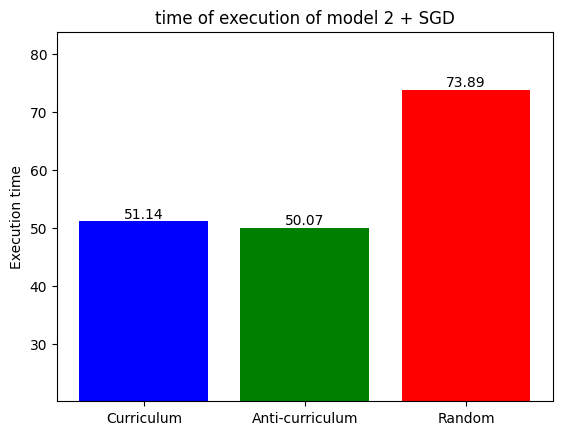

In [164]:
abels = ['Curriculum', 'Anti-curriculum', 'Random']
values = [time_curri_SGD_2, time_anti_curri_SGD_2, time_random_SGD_2]
plt.bar(labels, values, color=['blue', 'green', 'red'])
for i, v in enumerate(values):
    plt.text(i, v + 0.001, f'{v:.2f}', ha='center', va='bottom', fontsize=10)
plt.ylim(min(values) - 30, max(values) + 10)
plt.title("time of execution of model 2 + SGD")
plt.ylabel("Execution time")
plt.show()

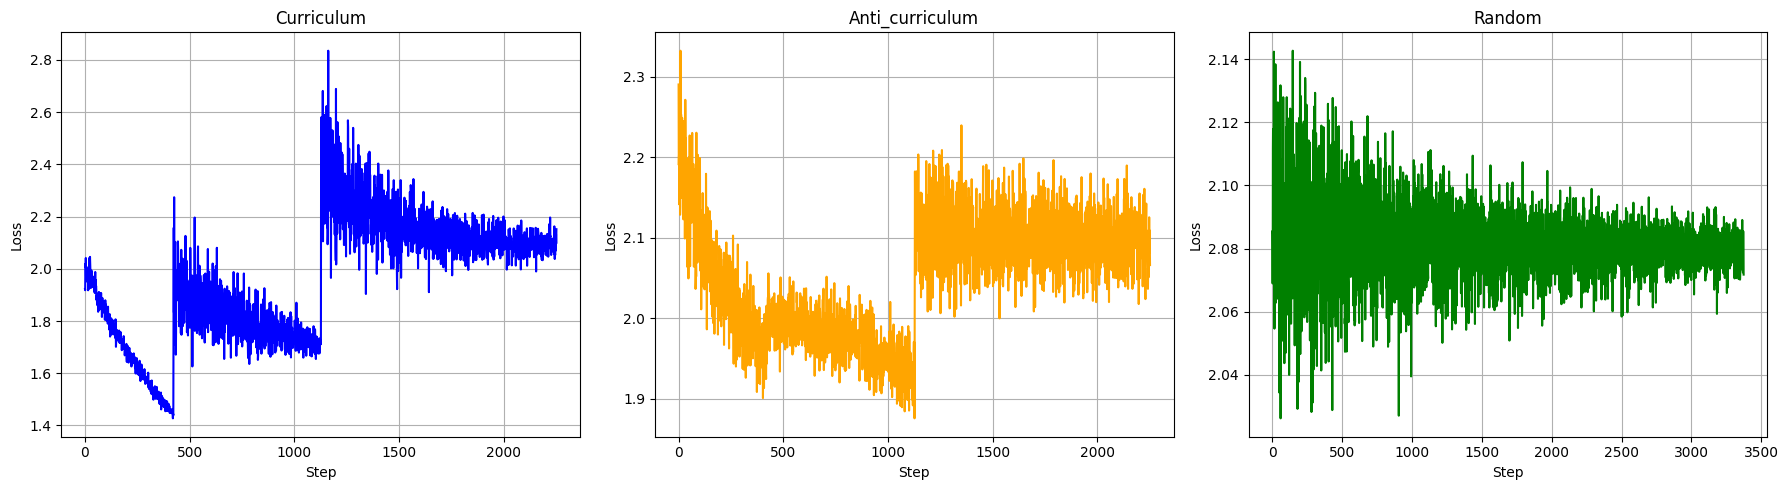

In [165]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  

# -------- Curriculum --------
axes[0].plot(curri_losses_SGD_2, label='Curriculum', color='blue')
axes[0].set_title('Curriculum')
axes[0].set_xlabel('Step')
axes[0].set_ylabel('Loss')
axes[0].grid(True)

# -------- Anti-curriculum --------
axes[1].plot(anti_curri_losses_SGD_2, label='Anti_curriculum', color='orange')
axes[1].set_title('Anti_curriculum')
axes[1].set_xlabel('Step')
axes[1].set_ylabel('Loss')
axes[1].grid(True)

# --------  Random --------
axes[2].plot(random_losses_SGD_2, label='Random', color='green')
axes[2].set_title('Random')
axes[2].set_xlabel('Step')
axes[2].set_ylabel('Loss')
axes[2].grid(True)

plt.tight_layout()
plt.show()

### Model 3 + SGD

In [169]:
# curriculum learning 

model = sh.ShapeCNN_3(num_classes=8)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

curri_losses_SGD_3 = []
start_time = time()
for epoch in range(3):
    print(f"Epoch {epoch+1} - Easy")
    batch_losses, _ = sh.train(model, curri_level_1, criterion, optimizer)
    curri_losses_SGD_3.extend(batch_losses)

for epoch in range(3):
    print(f"Epoch {epoch+1} - Medium")
    batch_losses, _ = sh.train(model, curri_level_2, criterion, optimizer)
    curri_losses_SGD_3.extend(batch_losses)

for epoch in range(3):
    print(f"Epoch {epoch+1} - Hard")
    batch_losses, _ = sh.train(model, curri_level_3, criterion, optimizer)
    curri_losses_SGD_3.extend(batch_losses)

end_time = time()
acc_curri_SGD_3 = sh.evaluate(model, test_data)
time_curri_SGD_3 = end_time - start_time

Epoch 1 - Easy
Epoch 2 - Easy
Epoch 3 - Easy
Epoch 1 - Medium
Epoch 2 - Medium
Epoch 3 - Medium
Epoch 1 - Hard
Epoch 2 - Hard
Epoch 3 - Hard


In [170]:
# Anti_curriculum 

model = sh.ShapeCNN_3(num_classes=8)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

anti_curri_losses_SGD_3 = []
start_time = time()
for epoch in range(3):
    print(f"Epoch {epoch+1} - Easy")
    batch_losses, _ = sh.train(model, anti_curri_level_1, criterion, optimizer)
    anti_curri_losses_SGD_3.extend(batch_losses)

for epoch in range(3):
    print(f"Epoch {epoch+1} - Medium")
    batch_losses, _ = sh.train(model, anti_curri_level_2, criterion, optimizer)
    anti_curri_losses_SGD_3.extend(batch_losses)

for epoch in range(3):
    print(f"Epoch {epoch+1} - Hard")
    batch_losses, _ = sh.train(model, anti_curri_level_3, criterion, optimizer)
    anti_curri_losses_SGD_3.extend(batch_losses)

end_time = time()
acc_anti_curri_SGD_3 = sh.evaluate(model, test_data)
time_anti_curri_SGD_3 = end_time - start_time

Epoch 1 - Easy
Epoch 2 - Easy
Epoch 3 - Easy
Epoch 1 - Medium
Epoch 2 - Medium
Epoch 3 - Medium
Epoch 1 - Hard
Epoch 2 - Hard
Epoch 3 - Hard


In [171]:
# random 
random_losses_SGD_3 = []
model = sh.ShapeCNN_3(num_classes=8)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)
start_time = time()
for epoch in range(9):  
    print(f"Epoch {epoch+1} - Shuffled")
    batch_losses, _ = sh.train(model, rand_level , criterion, optimizer)
    random_losses_SGD_3.extend(batch_losses)
end_time = time()
acc_random_SGD_3 = sh.evaluate(model, test_data)
time_random_SGD_3 = end_time - start_time

Epoch 1 - Shuffled
Epoch 2 - Shuffled
Epoch 3 - Shuffled
Epoch 4 - Shuffled
Epoch 5 - Shuffled
Epoch 6 - Shuffled
Epoch 7 - Shuffled
Epoch 8 - Shuffled
Epoch 9 - Shuffled


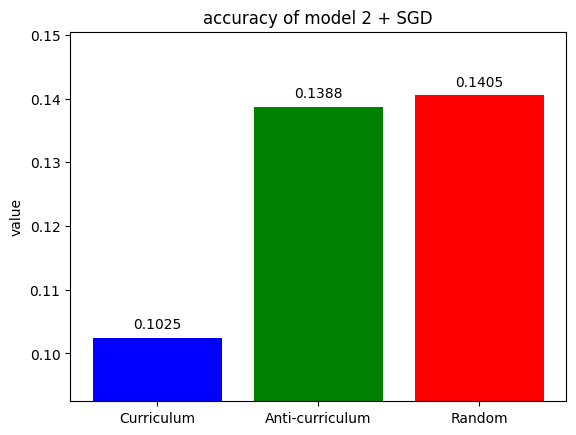

In [172]:
labels = ['Curriculum', 'Anti-curriculum', 'Random']
values = [acc_curri_SGD_3, acc_anti_curri_SGD_3, acc_random_SGD_3]
plt.bar(labels, values, color=['blue', 'green', 'red'])
for i, v in enumerate(values):
    plt.text(i, v + 0.001, f'{v:.4f}', ha='center', va='bottom', fontsize=10)
plt.ylim(min(values) - 0.01, max(values) + 0.01)
plt.title("accuracy of model 2 + SGD")
plt.ylabel("value")
plt.show()

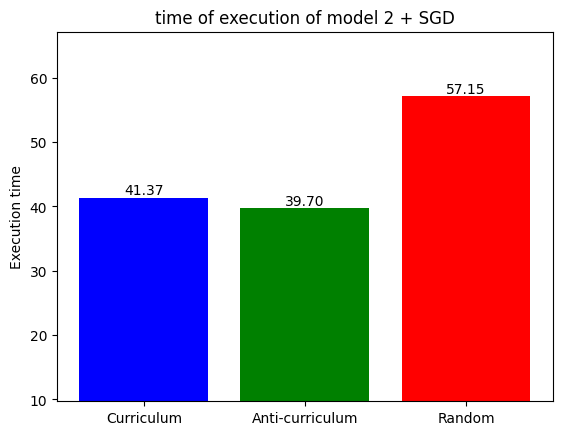

In [173]:
abels = ['Curriculum', 'Anti-curriculum', 'Random']
values = [time_curri_SGD_3, time_anti_curri_SGD_3, time_random_SGD_3]
plt.bar(labels, values, color=['blue', 'green', 'red'])
for i, v in enumerate(values):
    plt.text(i, v + 0.001, f'{v:.2f}', ha='center', va='bottom', fontsize=10)
plt.ylim(min(values) - 30, max(values) + 10)
plt.title("time of execution of model 2 + SGD")
plt.ylabel("Execution time")
plt.show()

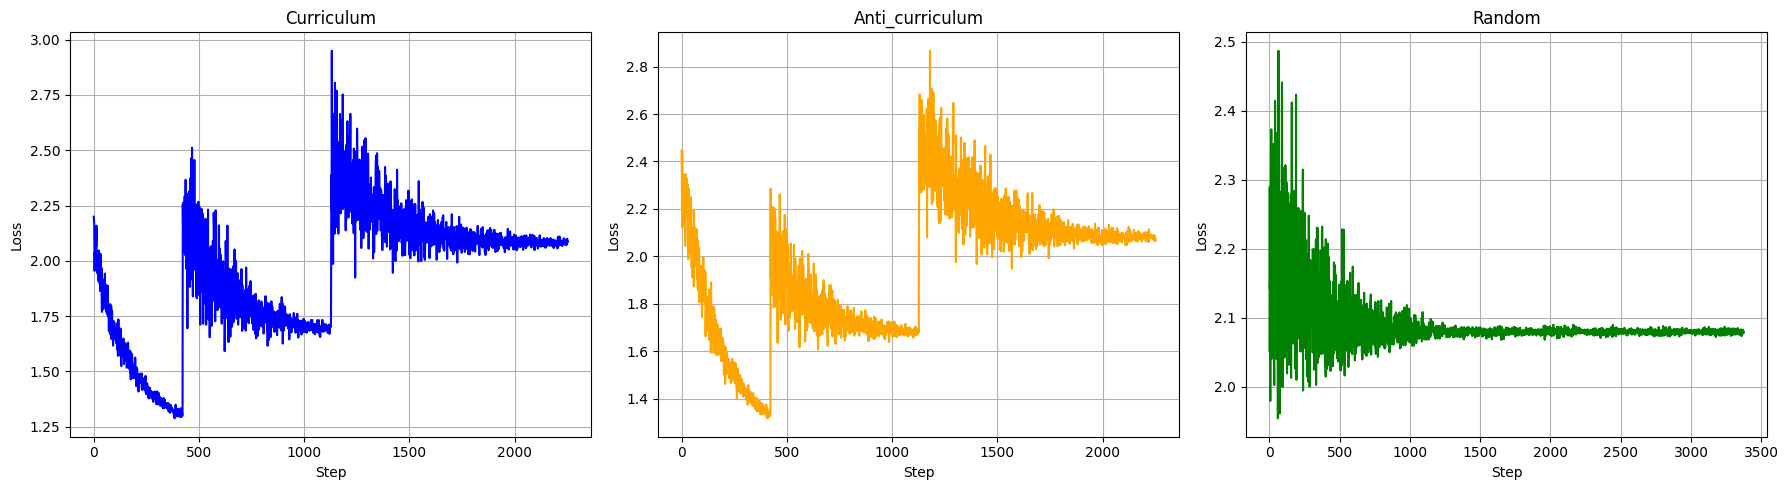

In [174]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  

# -------- Curriculum --------
axes[0].plot(curri_losses_SGD_3, label='Curriculum', color='blue')
axes[0].set_title('Curriculum')
axes[0].set_xlabel('Step')
axes[0].set_ylabel('Loss')
axes[0].grid(True)

# -------- Anti-curriculum --------
axes[1].plot(anti_curri_losses_SGD_3, label='Anti_curriculum', color='orange')
axes[1].set_title('Anti_curriculum')
axes[1].set_xlabel('Step')
axes[1].set_ylabel('Loss')
axes[1].grid(True)

# --------  Random --------
axes[2].plot(random_losses_SGD_3, label='Random', color='green')
axes[2].set_title('Random')
axes[2].set_xlabel('Step')
axes[2].set_ylabel('Loss')
axes[2].grid(True)

plt.tight_layout()
plt.show()